In [1]:
import napari
import numpy as np
from skimage import draw

from morphometrics.measure.surface import distance_between_surfaces
from morphometrics.utils.surface_utils import binary_mask_to_surface

In [2]:
spheroid_mask = np.zeros((100, 100, 100), dtype=bool)
spheroid_mask[9:92, 9:92, 9:92] = draw.ellipsoid(40, 40, 40)

lumen_mask = np.zeros((100, 100, 100), dtype=bool)
lumen_mask[19:82, 29:72, 29:72] = draw.ellipsoid(30, 20, 20)

organoid_mask = spheroid_mask.copy()
organoid_mask[lumen_mask] = False

In [3]:
# make the spheroid mesh
spheroid_mesh = binary_mask_to_surface(
    spheroid_mask,
    n_mesh_smoothing_interations=50
)
spheroid_vertices = spheroid_mesh.vertices
spheroid_faces = spheroid_mesh.faces
spheroid_values = np.ones((len(spheroid_vertices),))


In [4]:
# make the lumen mesh
lumen_mesh = binary_mask_to_surface(
    lumen_mask,
    n_mesh_smoothing_interations=50
)
lumen_vertices = lumen_mesh.vertices
lumen_faces = lumen_mesh.faces
lumen_values = np.ones((len(lumen_vertices),))


In [5]:
# calculate distance from the outer surface mesh
# to the lumen mesn
distances = distance_between_surfaces(
    source_surface=spheroid_mesh,
    destination_surface=lumen_mesh
)

In [6]:
distances.mean()

16.885118416401557

In [7]:
# view the "organoid"
viewer = napari.Viewer(ndisplay=3)

clipping_plane = [
        {
            "position": [50, 50, 50],
            "normal": [0, 1, 0],
            "enabled": True
        }
    ]

viewer.add_image(
    organoid_mask,
    colormap='bop orange',
    rendering='iso',
    iso_threshold=0,
    experimental_clipping_planes=clipping_plane
)

<Image layer 'organoid_mask' at 0x7fcfe06857c0>

In [8]:
# add outer surface to viewer, colored by distance to lumen
viewer.add_surface(
    (spheroid_vertices, spheroid_faces, distances),
    colormap='viridis',
    experimental_clipping_planes=clipping_plane
)

<Surface layer 'Surface' at 0x7fcfe410f820>

In [9]:
# add lumen surface to viewer
viewer.add_surface((lumen_vertices, lumen_faces, lumen_values))

<Surface layer 'Surface [1]' at 0x7fcfe410f790>

In [11]:
from morphometrics.utils.napari_utils import add_surface_normals_to_viewer

# add the surface normals to the viewer
surface_normals = add_surface_normals_to_viewer(
    viewer=viewer,
    surface=spheroid_mesh
)
surface_normals.experimental_clipping_planes = clipping_plane


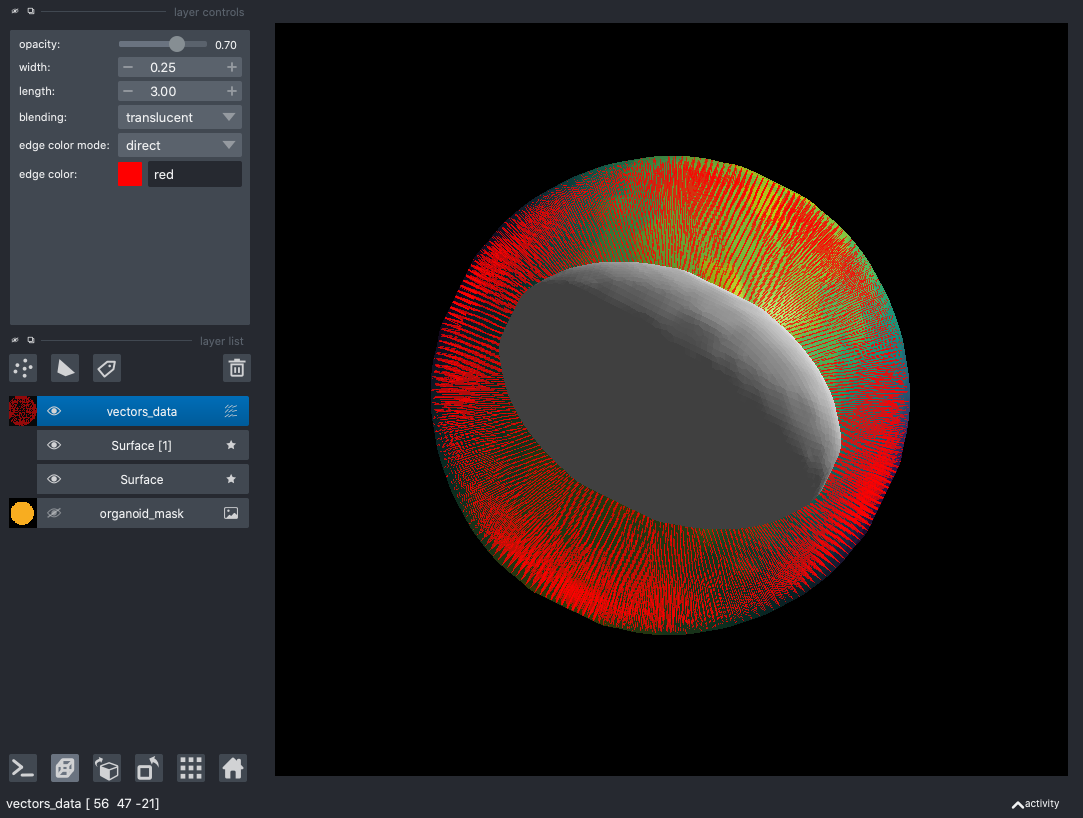

In [12]:
from napari.utils import nbscreenshot
nbscreenshot(viewer)